### Matrix condition number
__MATH 420__ <br>
_Spring 2021_ <br>

To use Julia's code for the matrix condition number, we'll need to load the `LinearAlgebra` package. If you have not already added this package, you will need to first use the package manager to install it.

In [1]:
using LinearAlgebra,Gadfly

The function `trimatrix` can be used to construct a symmetric tridiagonal matrix with main diagonal of 2 and subdiagonals of `x`

In [2]:
function trimatrix(i,j,x)
    if i == j
        2
    elseif abs(i-j) == 1
        x
    else
        0
    end
end

trimatrix (generic function with 1 method)

An example: let's find the infinity norm condition number of a $10 \times 10$ matrix with subdiagonals of -1.

In [3]:
M = [trimatrix(i,j,-1) for i in 1:10,j in 1:10]

10×10 Matrix{Int64}:
  2  -1   0   0   0   0   0   0   0   0
 -1   2  -1   0   0   0   0   0   0   0
  0  -1   2  -1   0   0   0   0   0   0
  0   0  -1   2  -1   0   0   0   0   0
  0   0   0  -1   2  -1   0   0   0   0
  0   0   0   0  -1   2  -1   0   0   0
  0   0   0   0   0  -1   2  -1   0   0
  0   0   0   0   0   0  -1   2  -1   0
  0   0   0   0   0   0   0  -1   2  -1
  0   0   0   0   0   0   0   0  -1   2

In [4]:
cond(M,Inf)

60.00000000000001

To study the condition number of this matrix for various values of $x$ and size $n$, we can do this

In [5]:
function Mc(x,n)
    cond([trimatrix(i,j,x) for i in 1:n, j in 1:n], Inf)
end

Mc (generic function with 1 method)

First, for $x = -1$, let's look at the infinity norm condition number as a function of matrix size

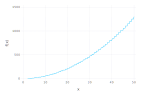

In [6]:
plot(n -> Mc(-1,floor(n)), 2,50)

Second, for a size of $100 \times 100$, let's look at the common logarithm of the condition number as a function of $x$.

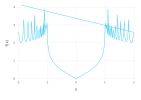

In [7]:
plot(x -> log10(Mc(x,50)), -2,2)

I know what you are thinking--is this graph for real? Yes, mostly it is, but in reality, the peaks are singularities--by this, we mean that the function "blows up" at these peaks. Additionally, the algorithm that finds the condition number is an estimate, but it's not guaranteed to be either a lower or an upper bound--just a pretty good value.

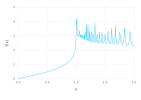

In [8]:
plot(x -> log10(Mc(x,100)), 0,2)

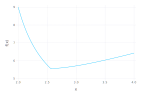

In [9]:
plot(x -> Mc(x,3), 2,4)

For the $3 \times 3$ case, the exact value of the infinity norm condition number is

In [10]:
FFF = x -> 2*(abs(x)+1)*max((abs(x)+1)/abs(x^2-2),(abs(x^2-4)+2*abs(x)+x^2)/(4*abs(x^2-2)))

#21 (generic function with 1 method)

Although Julia's matrix condition number is an estimate, at least for the $3 \times 3$ 
case it is accurate for this case:

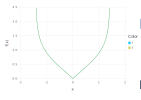

In [11]:
plot([x -> log10(Mc(x,3)), x -> log10(FFF(x))], -1.4,1.4)